In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
# df=pd.read_csv(r"C:\Users\ashik\Downloads\Practice-Datacsv.csv")
df=pd.read_csv('clean_salesman.csv')

In [55]:
df.head(10)

,JE Code,Store,Country,Region,Date,Item,Salesperson,List Price,Actual Price,Discount %
0,I-1001,Moscow,Russia,EMEA,06-10-2018,Microwave,May Wilmot,80,79,1.25%
1,I-1002,Toronto,Canada,NaN,4/23/2015,Microwave,David Shiner,80,54,32.50%
2,I-1003,Sao Paolo,Brazil,LATAM,03-04-2017,Air conditioner,Gary Reynolds,700,686,2.00%
3,I-1004,Istanbul,Turkey,EMEA,8/14/2018,Ceiling fan,Mark Buntain,150,137,8.67%
4,I-1005,Sydney,Australia,APAC,03-03-2015,Toaster,Christine Davies,50,37,26.00%
5,I-1006,Shenzhen,China,APAC,4/25/2016,Iron,Gary Shaw,30,29,3.33%
6,I-1007,Lima,Peru,LATAM,06-06-2016,Dishwasher,Christopher Cresswell,500,465,7.00%
7,I-1008,Tijuana,Mexico,LATAM,07-06-2016,Iron,Gillian Allnutt,30,28,6.67%
8,I-1009,London,UK,EMEA,11-12-2015,Washing Machine,Francis Godden,800,760,5.00%
9,I-1010,Lima,Peru,LATAM,07-09-2014,Iron,Christopher Cresswell,30,28,6.67%


In [5]:
df.isnull().sum()

JE Code           0
Store             0
Country           0
Region          393
Date              0
Item              0
Salesperson       0
List Price        0
Actual Price      0
Discount %        0
dtype: int64

In [71]:
df['Region']=df['Region'].fillna(df['Region'].mode()[0])

In [72]:
df.isnull().sum()

JE Code         0
Store           0
Country         0
Region          0
Item            0
Salesperson     0
List Price      0
Actual Price    0
Discount %      0
Clean_Date      0
dtype: int64

In [16]:
df.groupby('Region')['Actual Price'].sum()

Region
APAC     167030
EMEA     412497
LATAM     98489
Name: Actual Price, dtype: int64

In [37]:
df.head()


,JE Code,Store,Country,Region,Date,Item,Salesperson,List Price,Actual Price,Discount %
0,I-1001,Moscow,Russia,EMEA,2018-10-06,Microwave,May Wilmot,80,79,1.25%
1,I-1002,Toronto,Canada,EMEA,NaT,Microwave,David Shiner,80,54,32.50%
2,I-1003,Sao Paolo,Brazil,LATAM,2017-04-03,Air conditioner,Gary Reynolds,700,686,2.00%
3,I-1004,Istanbul,Turkey,EMEA,NaT,Ceiling fan,Mark Buntain,150,137,8.67%
4,I-1005,Sydney,Australia,APAC,2015-03-03,Toaster,Christine Davies,50,37,26.00%


In [36]:
df.groupby('Date')['Actual Price'].sum()


Date
2014-01-02      44
2014-01-03     792
2014-01-04     284
2014-01-05     560
2014-01-06     600
              ... 
2018-12-02      43
2018-12-04     127
2018-12-09    1840
2018-12-11    1077
2018-12-12     500
Name: Actual Price, Length: 523, dtype: int64

In [44]:
df['Date']=df['Date'].astype(str)

In [45]:
df['Date1']=pd.to_datetime(df['Date'].str.replace('/','-', regex=False),
                          format='%d-%m-%Y',
                          errors='coerce')

In [47]:
df['Date2']=pd.to_datetime(
    df['Date'],
    format='%m/%d/%Y',
    errors='coerce')

In [48]:
df['Clean_date']=df['Date1'].combine_first(df['Date2'])

In [49]:
df.head()

,JE Code,Store,Country,Region,Date,Item,Salesperson,List Price,Actual Price,Discount %,Date1,Date2,Clean_date
0,I-1001,Moscow,Russia,EMEA,NaT,Microwave,May Wilmot,80,79,1.25%,NaT,NaT,NaT
1,I-1002,Toronto,Canada,EMEA,NaT,Microwave,David Shiner,80,54,32.50%,NaT,NaT,NaT
2,I-1003,Sao Paolo,Brazil,LATAM,NaT,Air conditioner,Gary Reynolds,700,686,2.00%,NaT,NaT,NaT
3,I-1004,Istanbul,Turkey,EMEA,NaT,Ceiling fan,Mark Buntain,150,137,8.67%,NaT,NaT,NaT
4,I-1005,Sydney,Australia,APAC,NaT,Toaster,Christine Davies,50,37,26.00%,NaT,NaT,NaT


In [50]:
print(df.columns)


Index(['JE Code', 'Store', 'Country', 'Region', 'Date', 'Item', 'Salesperson',
       'List Price', 'Actual Price', 'Discount %', 'Date1', 'Date2',
       'Clean_date'],
      dtype='object')


In [52]:
from dateutil import parser

def parse_mixed_dates(x):
    try:
        return parser.parse(x, dayfirst=False)
    except:
        try:
            return parser.parse(x, dayfirst=True)
        except:
            return None

df['Clean_date'] = df['Date'].astype(str).apply(parse_mixed_dates)


In [53]:
df.head()

,JE Code,Store,Country,Region,Date,Item,Salesperson,List Price,Actual Price,Discount %,Date1,Date2,Clean_date
0,I-1001,Moscow,Russia,EMEA,NaT,Microwave,May Wilmot,80,79,1.25%,NaT,NaT,None
1,I-1002,Toronto,Canada,EMEA,NaT,Microwave,David Shiner,80,54,32.50%,NaT,NaT,None
2,I-1003,Sao Paolo,Brazil,LATAM,NaT,Air conditioner,Gary Reynolds,700,686,2.00%,NaT,NaT,None
3,I-1004,Istanbul,Turkey,EMEA,NaT,Ceiling fan,Mark Buntain,150,137,8.67%,NaT,NaT,None
4,I-1005,Sydney,Australia,APAC,NaT,Toaster,Christine Davies,50,37,26.00%,NaT,NaT,None


In [56]:
df['Date1'] = pd.to_datetime(
    df['Date'],
    format='%d-%m-%Y',
    errors='coerce'
)


In [57]:
df['Date2'] = pd.to_datetime(
    df['Date'],
    format='%m/%d/%Y',
    errors='coerce'
)


In [58]:
df['Clean_Date'] = df['Date1'].combine_first(df['Date2'])


In [67]:
df.head(10)

,JE Code,Store,Country,Region,Date,Item,Salesperson,List Price,Actual Price,Discount %,Clean_Date
0,I-1001,Moscow,Russia,EMEA,06-10-2018,Microwave,May Wilmot,80,79,1.25%,2018-10-06
1,I-1002,Toronto,Canada,NaN,4/23/2015,Microwave,David Shiner,80,54,32.50%,2015-04-23
2,I-1003,Sao Paolo,Brazil,LATAM,03-04-2017,Air conditioner,Gary Reynolds,700,686,2.00%,2017-04-03
3,I-1004,Istanbul,Turkey,EMEA,8/14/2018,Ceiling fan,Mark Buntain,150,137,8.67%,2018-08-14
4,I-1005,Sydney,Australia,APAC,03-03-2015,Toaster,Christine Davies,50,37,26.00%,2015-03-03
5,I-1006,Shenzhen,China,APAC,4/25/2016,Iron,Gary Shaw,30,29,3.33%,2016-04-25
6,I-1007,Lima,Peru,LATAM,06-06-2016,Dishwasher,Christopher Cresswell,500,465,7.00%,2016-06-06
7,I-1008,Tijuana,Mexico,LATAM,07-06-2016,Iron,Gillian Allnutt,30,28,6.67%,2016-06-07
8,I-1009,London,UK,EMEA,11-12-2015,Washing Machine,Francis Godden,800,760,5.00%,2015-12-11
9,I-1010,Lima,Peru,LATAM,07-09-2014,Iron,Christopher Cresswell,30,28,6.67%,2014-09-07


In [65]:
# Convert DD-MM-YYYY
df['Date1'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')

# Convert MM/DD/YYYY
df['Date2'] = pd.to_datetime(df['Date'], format='%m/%d/%Y', errors='coerce')

# Final Clean Date
df['Clean_Date'] = df['Date1'].combine_first(df['Date2'])

# Drop extra columns
df.drop(columns=['Date1', 'Date2'], inplace=True)


In [90]:
df.drop(columns=['Discount %'], inplace=True)


In [91]:
df.head()

,JE Code,Store,Country,Region,Item,Salesperson,List Price,Actual Price,Clean_Date,Discount_num
0,I-1001,Moscow,Russia,EMEA,Microwave,May Wilmot,80,79,2018-10-06,1.25
1,I-1002,Toronto,Canada,EMEA,Microwave,David Shiner,80,54,2015-04-23,32.50
2,I-1003,Sao Paolo,Brazil,LATAM,Air conditioner,Gary Reynolds,700,686,2017-04-03,2.00
3,I-1004,Istanbul,Turkey,EMEA,Ceiling fan,Mark Buntain,150,137,2018-08-14,8.67
4,I-1005,Sydney,Australia,APAC,Toaster,Christine Davies,50,37,2015-03-03,26.00


In [85]:
# Convert 'Discount %' column to numeric
df['Discount_num'] = df['Discount %'].str.replace('%', '', regex=False).astype(float)

# # Calculate average
# Avg = df['Discount_num'].mean()

# print("Average Discount %:", Avg)


In [142]:
df.to_csv('clean_salesman.csv', index=False)

In [143]:
df=pd.read_csv('clean_salesman.csv')

In [144]:
df.head()

,JE Code,Store,Country,Region,Item,Salesperson,List Price,Actual Price,Clean_Date,Discount_num,Price_Realization %,Year
0,I-1001,Moscow,Russia,EMEA,Microwave,May Wilmot,80,79,2018-10-06,1.25,98.750000,2018
1,I-1002,Toronto,Canada,EMEA,Microwave,David Shiner,80,54,2015-04-23,32.50,67.500000,2015
2,I-1003,Sao Paolo,Brazil,LATAM,Air conditioner,Gary Reynolds,700,686,2017-04-03,2.00,98.000000,2017
3,I-1004,Istanbul,Turkey,EMEA,Ceiling fan,Mark Buntain,150,137,2018-08-14,8.67,91.333333,2018
4,I-1005,Sydney,Australia,APAC,Toaster,Christine Davies,50,37,2015-03-03,26.00,74.000000,2015


In [80]:
Total=df['Actual Price'].sum()
print("Total Revenue",Total)

Total Revenue 678016


In [95]:
Avg=df['Discount_num'].mean()
print("Avg Discount%", Avg)

Avg Discount% 11.650769559640873


In [129]:
avg=df['Actual Price'].mean()
print("AVGRAGE",Avg)

AVGRAGE 11.650769559640873


In [131]:
total=df['Item'].count()
print("Total Item Slod", total)

Total Item Slod 2339


In [97]:
df.groupby('Item')['Actual Price'].sum()

Item
Air conditioner    122423
Blender              8719
Ceiling fan         24526
Coffee grinder      11856
Dishwasher          77205
Iron                 6463
Microwave           14558
Oven                96065
Refrigerator       140230
Toaster              8525
Vacuum Cleaner      43766
Washing Machine    123680
Name: Actual Price, dtype: int64

In [99]:
df.groupby('Region')['Actual Price'].sum()

Region
APAC     167030
EMEA     412497
LATAM     98489
Name: Actual Price, dtype: int64

In [101]:
df.groupby('Salesperson')['Actual Price'].sum()

Salesperson
Abdul Amos           3350
Abdul Heywood        1304
Abu Moore              74
Aidan Perrott         906
Alan Davie            654
                     ... 
Wolfgang Carvalho     962
Xun Simms             219
Zhan Whitfield        999
Zoe Munday           2213
Zulfiqar Mirza       3995
Name: Actual Price, Length: 510, dtype: int64

In [105]:
df.groupby('Item')['Actual Price'].max()

Item
Air conditioner     700
Blender              50
Ceiling fan         150
Coffee grinder       70
Dishwasher          500
Iron                 30
Microwave            80
Oven                500
Refrigerator       1000
Toaster              50
Vacuum Cleaner      250
Washing Machine     800
Name: Actual Price, dtype: int64

In [140]:
# df['Year']=df['Clean_Date'].dt.year
df['Year'] = df['Clean_Date'].dt.year


In [141]:
df['Clean_Date']=pd.to_datetime(df['Clean_Date'],errors='coerce')

In [145]:
df.groupby('Year')['Actual Price'].sum()

Year
2014    137737
2015    127355
2016    127289
2017    150973
2018    134662
Name: Actual Price, dtype: int64

In [113]:
df['List Price'] = pd.to_numeric(df['List Price'], errors='coerce')
df['Actual Price'] = pd.to_numeric(df['Actual Price'], errors='coerce')


In [115]:
df['Price_Realization %'] = (df['Actual Price'] / df['List Price']) * 100


In [116]:
df.head()

,JE Code,Store,Country,Region,Item,Salesperson,List Price,Actual Price,Clean_Date,Discount_num,Price_Realization %
0,I-1001,Moscow,Russia,EMEA,Microwave,May Wilmot,80,79,2018-10-06,1.25,98.750000
1,I-1002,Toronto,Canada,EMEA,Microwave,David Shiner,80,54,2015-04-23,32.50,67.500000
2,I-1003,Sao Paolo,Brazil,LATAM,Air conditioner,Gary Reynolds,700,686,2017-04-03,2.00,98.000000
3,I-1004,Istanbul,Turkey,EMEA,Ceiling fan,Mark Buntain,150,137,2018-08-14,8.67,91.333333
4,I-1005,Sydney,Australia,APAC,Toaster,Christine Davies,50,37,2015-03-03,26.00,74.000000


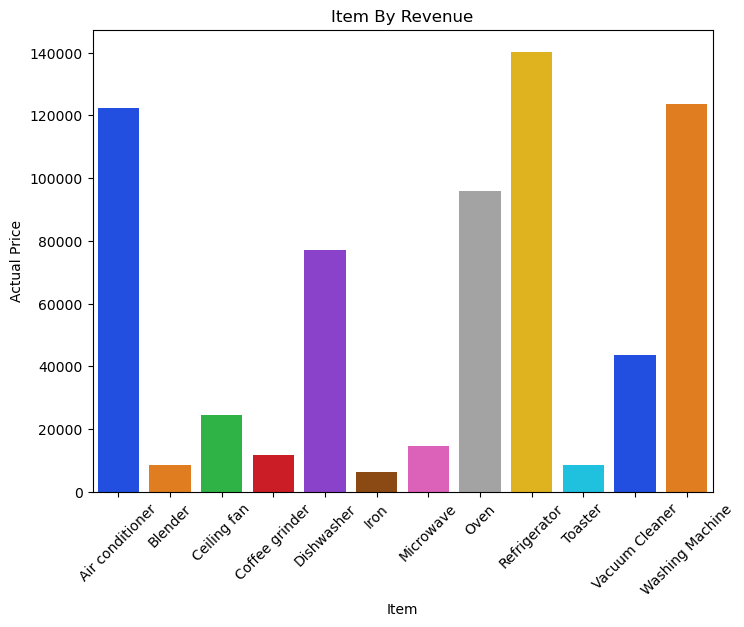

In [160]:
total=df.groupby('Item',as_index=False)['Actual Price'].sum() 
plt.figure(figsize=(8,6))
sns.barplot(data=total,x='Item',y='Actual Price',hue='Item',palette='bright')
plt.xticks(rotation=45)
plt.title("Item By Revenue")
plt.show()

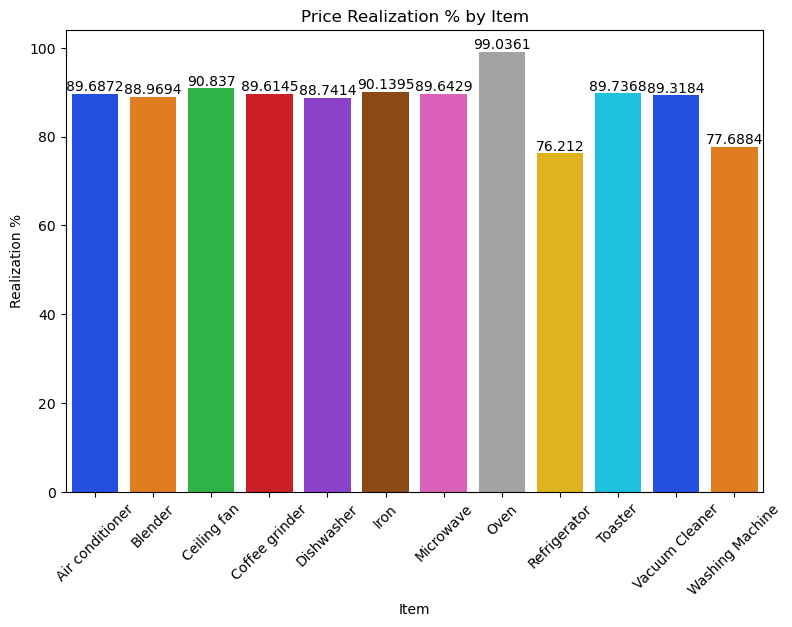

In [171]:
mean=df.groupby('Item',as_index=False)['Price_Realization %'].mean()
plt.figure(figsize=(9,6))
ax=sns.barplot(data=mean, x='Item',y='Price_Realization %',hue='Item',palette='bright')
for container in ax.containers:
    ax.bar_label(container)
plt.title("Price Realization % by Item")
plt.ylabel("Realization %")
plt.xticks(rotation=45)
plt.show()


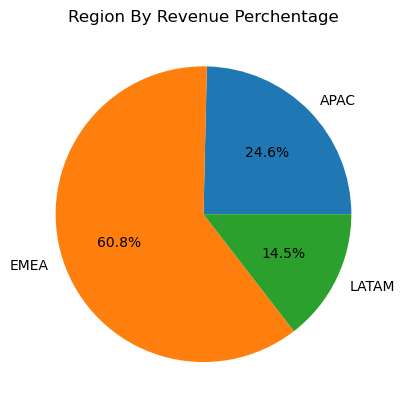

In [176]:
df.groupby('Region')['Actual Price'].sum().plot(kind='pie',autopct='%1.1f%%')
plt.title("Region By Revenue Perchentage")
plt.ylabel("")
plt.show()

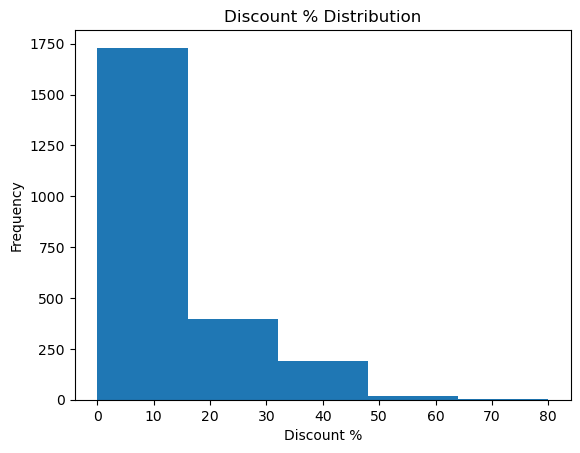

In [177]:
df['Discount_num'].plot(kind='hist', bins=5)
plt.title("Discount % Distribution")
plt.xlabel("Discount %")
plt.show()


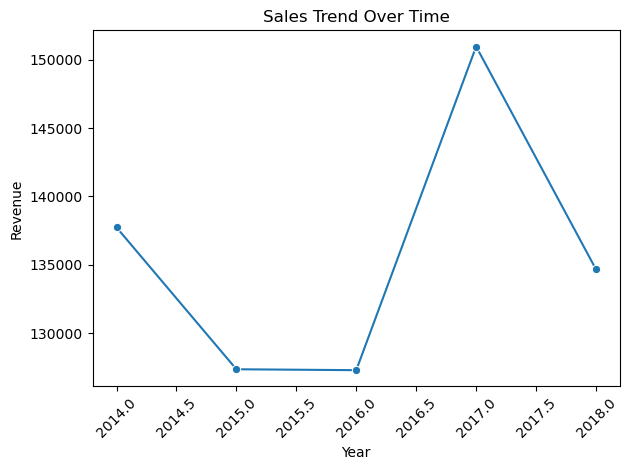

In [181]:
reve=df.groupby('Year',as_index=False)['Actual Price'].sum()
sns.lineplot(data=reve, x='Year', y='Actual Price', marker='o')

plt.title("Sales Trend Over Time")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

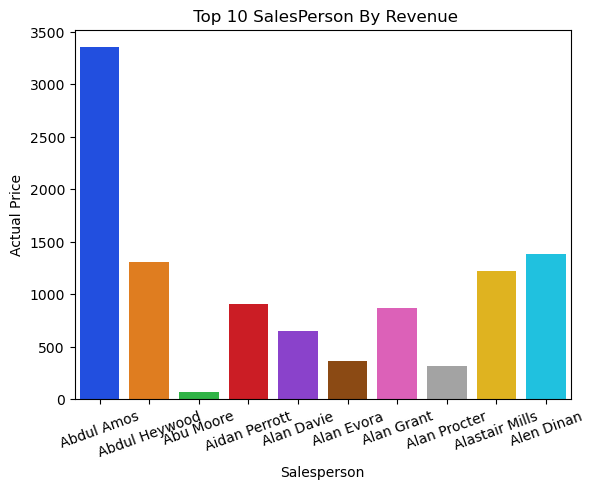

In [191]:
to=df.groupby('Salesperson',as_index=False)['Actual Price'].sum().head(10)
sns.barplot(data=to,x='Salesperson',y='Actual Price',hue='Salesperson',palette='bright')
plt.title(" Top 10 SalesPerson By Revenue")
plt.xticks(rotation=20)
plt.show()

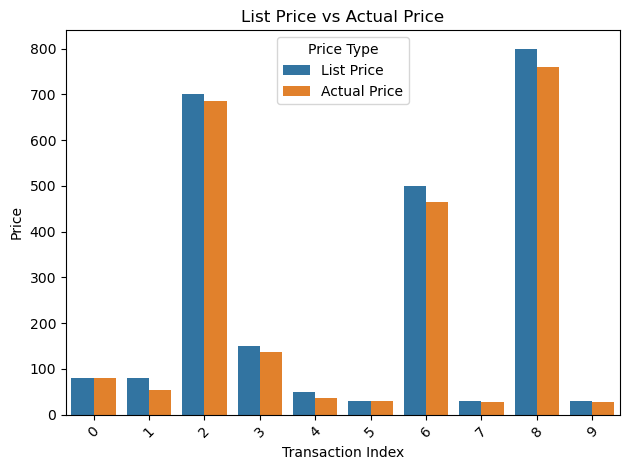

In [197]:
df_m = df[['List Price', 'Actual Price']].reset_index().head(10).melt(
    id_vars='index',
    value_vars=['List Price', 'Actual Price'],
    var_name='Price Type',
    value_name='Price'
)

# Plot
sns.barplot(data=df_m, x='index', y='Price', hue='Price Type')

plt.title("List Price vs Actual Price")
plt.xlabel("Transaction Index")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


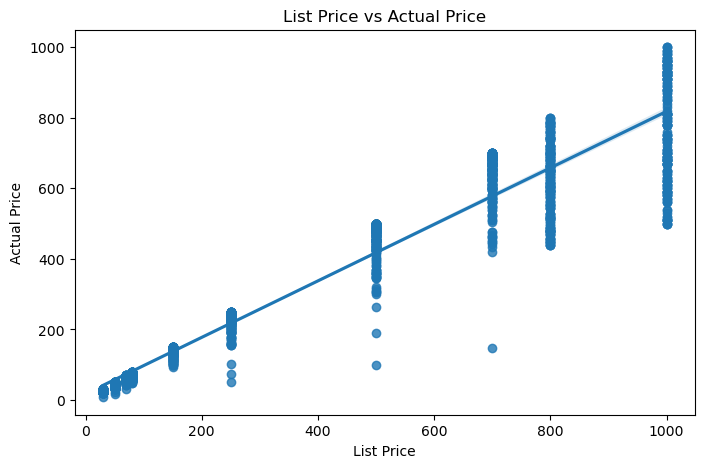

In [199]:
plt.figure(figsize=(8,5))
sns.regplot(x='List Price', y='Actual Price', data=df)
plt.title("List Price vs Actual Price")
plt.show()


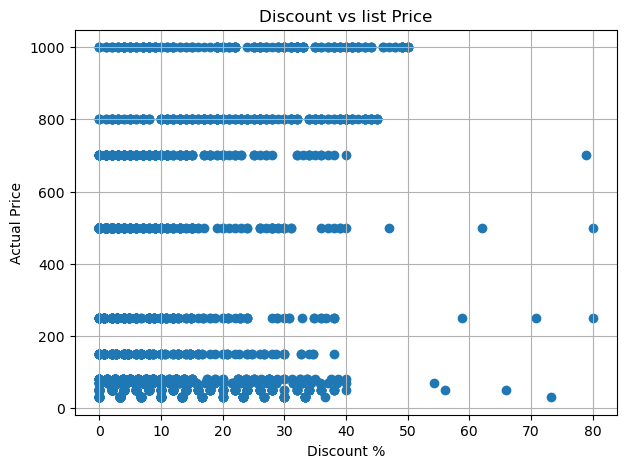

In [202]:
plt.figure(figsize=(7,5))
plt.scatter(df['Discount_num'], df['List Price'])
plt.title("Discount vs list Price")
plt.xlabel("Discount %")
plt.ylabel("Actual Price")
plt.grid(True)
plt.show()


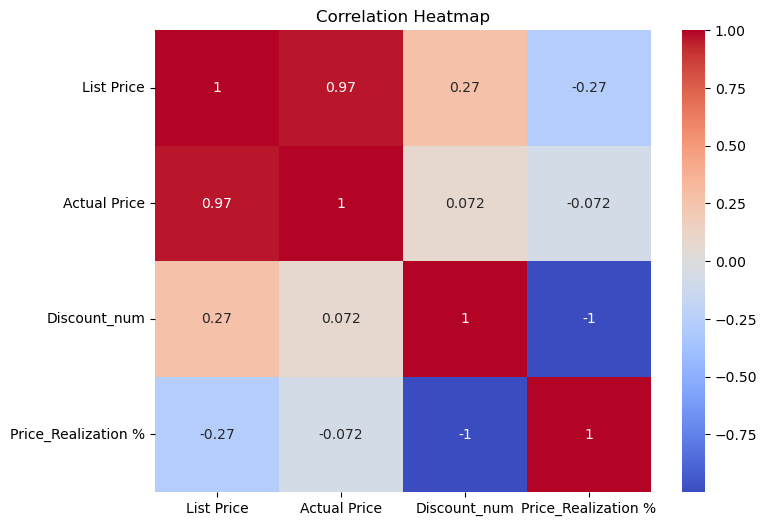

In [198]:
plt.figure(figsize=(8,6))
corr = df[['List Price','Actual Price','Discount_num','Price_Realization %']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


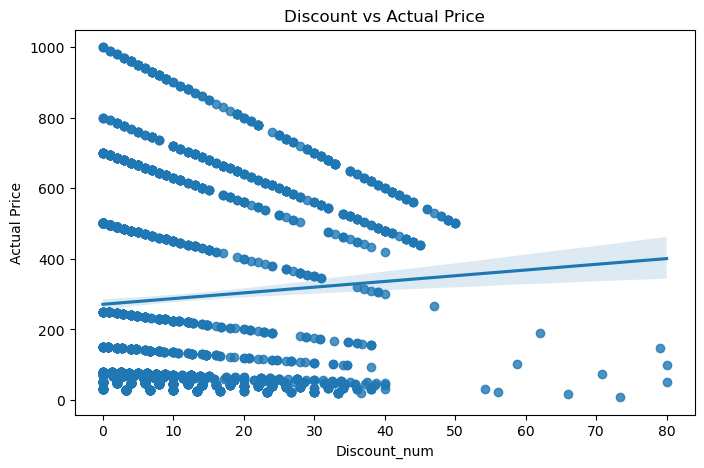

In [200]:
plt.figure(figsize=(8,5))
sns.regplot(x='Discount_num', y='Actual Price', data=df)
plt.title("Discount vs Actual Price")
plt.show()


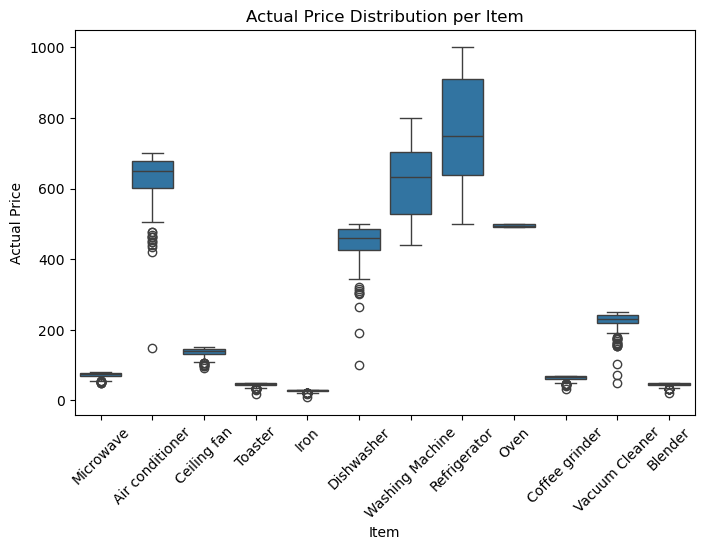

In [203]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Item', y='Actual Price', data=df)
plt.title("Actual Price Distribution per Item")
plt.xticks(rotation=45)
plt.show()


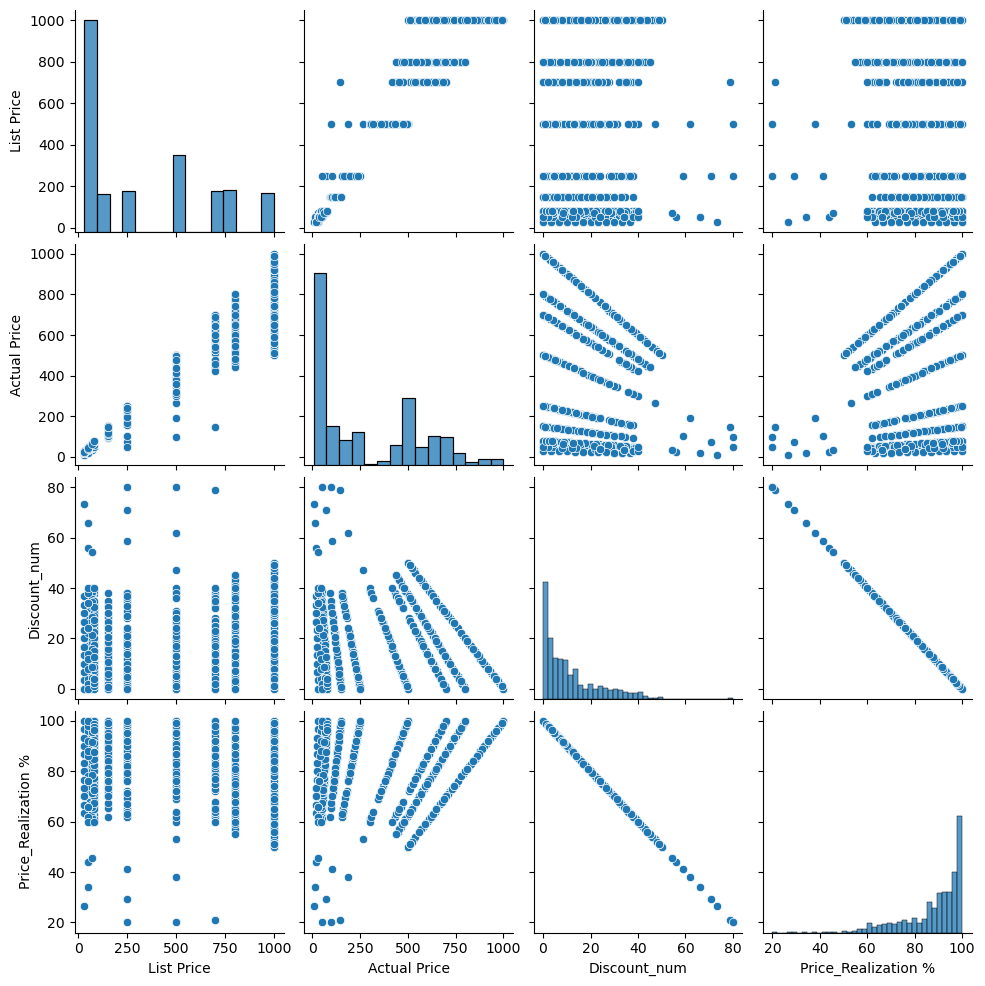

In [204]:
sns.pairplot(df[['List Price', 'Actual Price', 'Discount_num', 'Price_Realization %']])
plt.show()


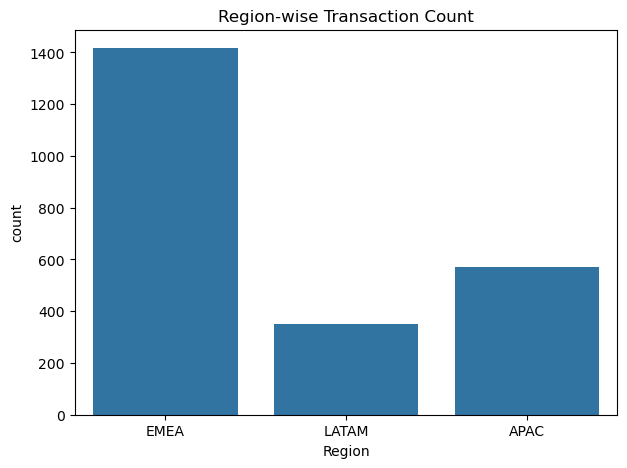

In [205]:
plt.figure(figsize=(7,5))
sns.countplot(x='Region', data=df)
plt.title("Region-wise Transaction Count")
plt.show()
